# Exploratory Data Analysis [ EDA ] - Supermarket Sales Dataset
    

In [443]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
font1 = {'family':'serif','color':'darkred','size':16}
font2 = {'family':'serif','color':'darkred','size':13}

### Load Supermarket Sales Dataset

In [445]:
data = pd.read_csv('supermarket_sales - Sheet1.xls',parse_dates=['Date'])

### Look at The Dataset

In [447]:
data.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6


- This dataset contains transaction-level sales records from a retail supercenter operating across three branches (A, B, and C) in different cities. The data captures customer demographics, purchase behavior, product categories, payment methods, and financial performance, making it suitable for sales analysis, customer behavior analysis, and business insights.

### Find Shape of Our Dataset [ Number of Rows And Number of Columns ]

In [450]:
print('shape of the dataset ::',data.shape)
print('Number of total Rows ::',data.shape[0])
print('Number of total Columns ::',data.shape[1])

shape of the dataset :: (1000, 17)
Number of total Rows :: 1000
Number of total Columns :: 17


- [ 1000 rows ] Each row represents one unique sales transaction.
- [ 17 columns ] These columns capture customer details, product information, financial metrics, time data, and customer feedback.

###  Check For Null Values In The Dataset

In [453]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

- There is no null value in dataset
- Dataset is suitable for sales analysis, customer behavior analysis, and business insights.

###  Get Information About Our Dataset 

In [456]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

- The dataset is well-structured, clean, and balanced, with a good mix of categorical and numerical variables.
- Absence of missing values significantly reduces preprocessing effort.
- Financial and temporal features allow detailed sales, profit, and trend analysis.
- Categorical variables enable customer segmentation and behavioral insights.
- The dataset is highly suitable for Exploratory Data Analysis (EDA)

### Get Overall Statistics About The Dataset

In [459]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,307.58738,4.761905e+00,15.379369,6.97270
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,4.761905e+00,49.650000,10.00000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,6.131498e-14,11.708825,1.71858


### separates categorical and numerical features based on the number of unique values

In [461]:
categorical_col=[]
numerical_col=[]
for column in data.columns:
    if data[column].nunique() > 10:
        numerical_col.append(column)
    else:
        categorical_col.append(column)

In [462]:
categorical_col

['Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Quantity',
 'Payment',
 'gross margin percentage']

### Find Aggregate Sales Among Branches.

Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64


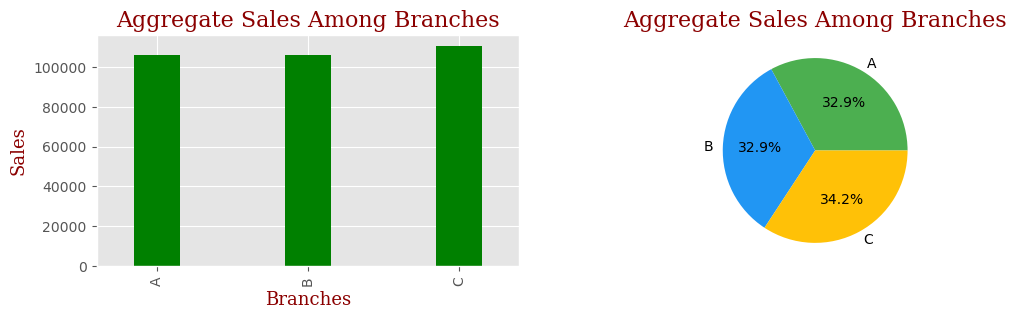

In [464]:
print(data.groupby('Branch')['Total'].sum())
a = data.groupby('Branch')['Total'].sum()
plt.figure(figsize=(12,3))
plt.subplot(121)
data.groupby('Branch')['Total'].sum().plot(kind = 'bar',color='green',width=0.3)
plt.title("Aggregate Sales Among Branches",fontdict=font1)
plt.xlabel("Branches",fontdict=font2)
plt.ylabel("Sales",fontdict=font2)

plt.subplot(122)
a.plot(kind='pie',autopct='%1.1f%%',colors=['#4CAF50', '#2196F3', '#FFC107'])
plt.title("Aggregate Sales Among Branches",fontdict=font1)
plt.ylabel("")
plt.show()

- Branch C records the highest aggregate sales with a total revenue of 110,568.71, indicating slightly stronger financial performance compared to the other branches.
- Branch A (106,200.37) and Branch B (106,197.67) show almost identical sales figures, reflecting very similar revenue-generating performance.

### Find The Most Popular Payment Method Used By Customers 

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64


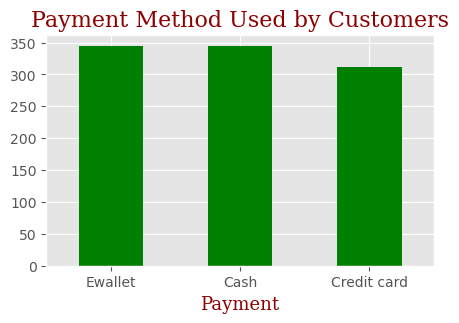

In [467]:
print(data['Payment'].value_counts())
plt.figure(figsize=(5,3))
data['Payment'].value_counts().plot(kind="bar",color= 'green')
plt.title("Payment Method Used by Customers",fontdict=font1)
plt.xlabel("Payment",fontdict=font2)
plt.xticks(rotation=0)
plt.show()

- E-wallet is the most popular payment method with 345 transactions, indicating a strong customer preference for digital and cashless payments.
- Cash (344 transactions) follows extremely closely, showing that traditional payment methods are still widely used.
- Credit card (311 transactions) is the least used payment method, though it still represents a significant share of transactions.

###  Find The Distribution of Customer Ratings.

count    1000.00000
mean        6.97270
std         1.71858
min         4.00000
25%         5.50000
50%         7.00000
75%         8.50000
max        10.00000
Name: Rating, dtype: float64


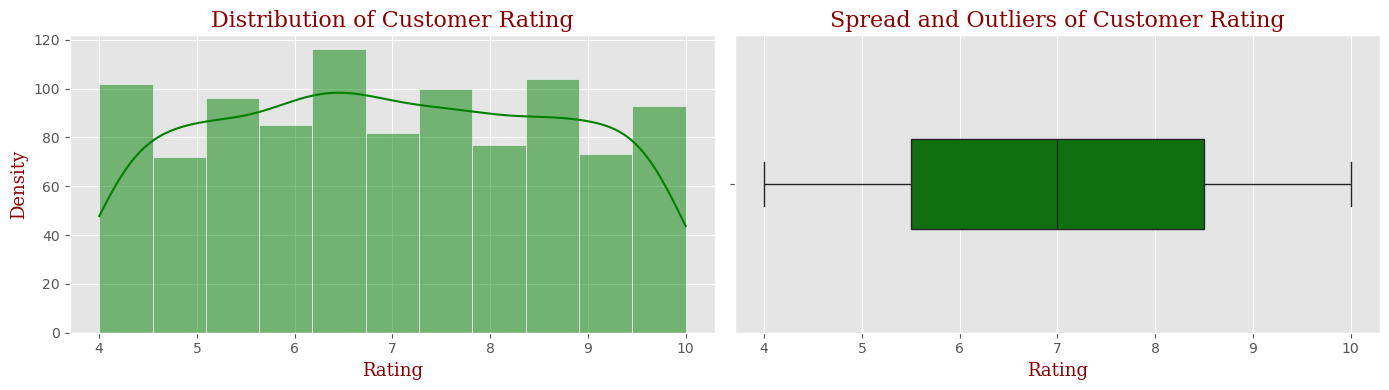

In [470]:
print(data['Rating'].describe())
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(data['Rating'],color = 'green',kde=True)
plt.title("Distribution of Customer Rating",fontdict=font1)
plt.xlabel("Rating",fontdict=font2)
plt.ylabel("Density",fontdict=font2)

plt.subplot(122)
sns.boxplot(x = data['Rating'],width=0.3,color='green')
plt.title('Spread and Outliers of Customer Rating',fontdict=font1)
plt.xlabel("Rating",fontdict=font2)
plt.tight_layout()
plt.show()

- The average customer rating is 6.97, indicating an overall positive shopping experience across the supercenters.
- The median rating of 7.0 is very close to the mean, suggesting a fairly symmetric distribution with no strong skewness.
- Ratings range from 4 to 10, showing that while most customers are satisfied, there is room for service improvement.
50% of customers rated their experience between 5.5 and 8.5, indicating that the majority of customers fall within a moderate-to-high satisfaction range.
- The standard deviation of 1.72 reflects moderate variability in customer experiences rather than extreme dissatisfaction or exceptional satisfaction.

### Find the Distribution of Cost of Goods Sold 

count    1000.00000
mean      307.58738
std       234.17651
min        10.17000
25%       118.49750
50%       241.76000
75%       448.90500
max       993.00000
Name: cogs, dtype: float64


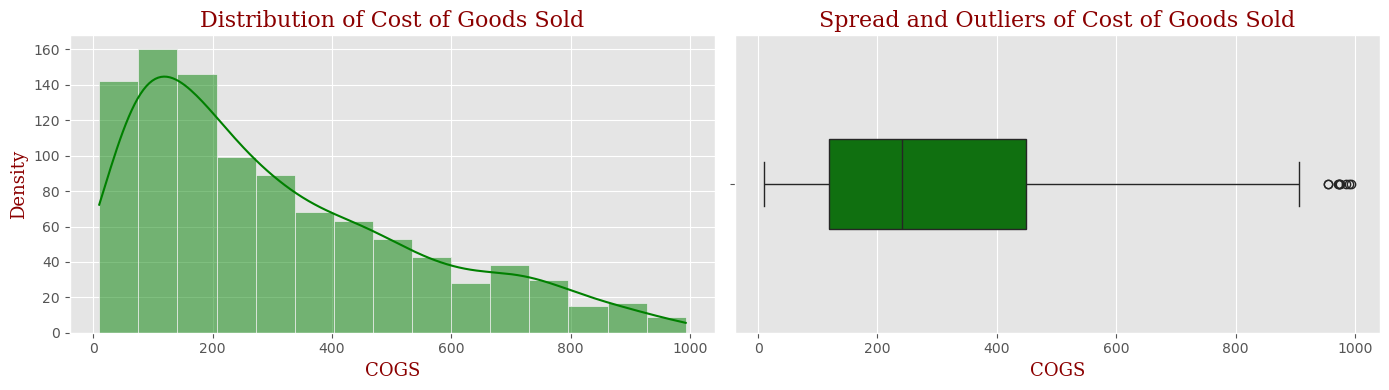

In [473]:
print(data['cogs'].describe())
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(data['cogs'], kde=True,color='green')
plt.title("Distribution of Cost of Goods Sold",fontdict=font1)
plt.xlabel("COGS",fontdict=font2)
plt.ylabel("Density",fontdict=font2)

plt.subplot(122)
sns.boxplot(x=data['cogs'], width=0.3,color='green')
plt.title('Spread and Outliers of Cost of Goods Sold',fontdict=font1)
plt.xlabel("COGS",fontdict=font2)
plt.tight_layout()
plt.show()

- On average, the business spends about 307.6 per transaction to sell products.
- Most transactions have a cost between 118.5 and 448.9.
- A few transactions have very high costs, which increases the average.
- This shows the store sells a mix of low-cost and high-cost products.

### Find Correlation
    Does The Cost of Goods Sold Affect The Ratings That The Customers Provide?
    Does Gross Income Affect The Ratings That The Customers Provide? 

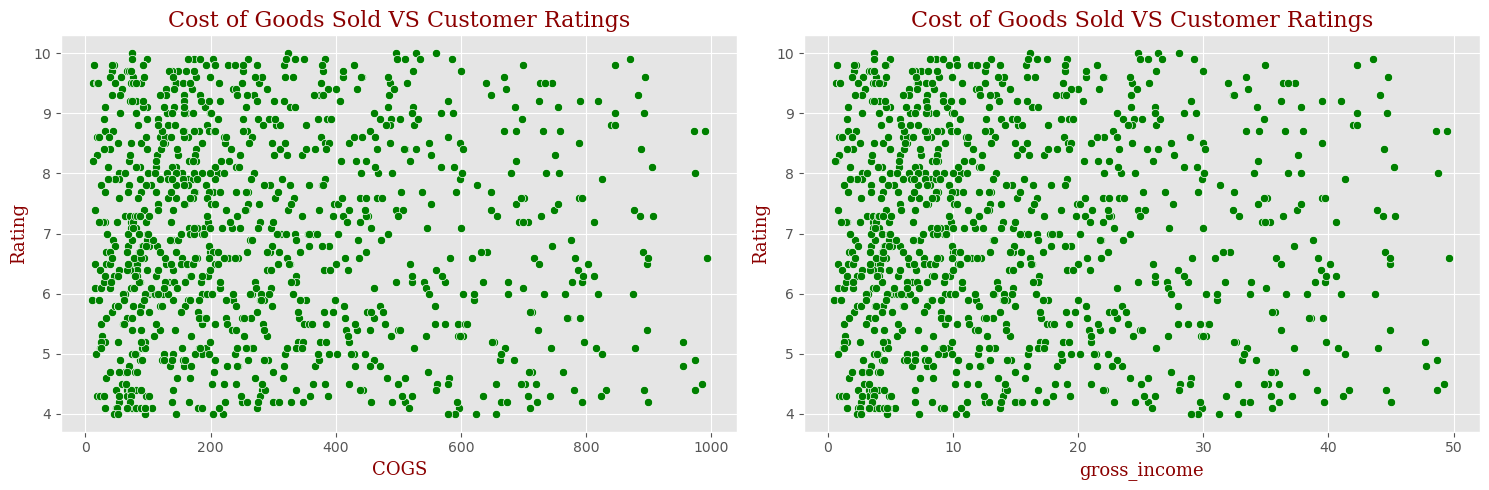

Correlation Betwwen COGS and Rating :: -0.03644170499701834
Correlation Between Gross Income and and Rating :: -0.03644170499701836


In [476]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.scatterplot(x= data['cogs'], y = data['Rating'],color='green')
plt.title("Cost of Goods Sold VS Customer Ratings",fontdict=font1)
plt.xlabel("COGS",fontdict=font2)
plt.ylabel("Rating",fontdict=font2)

plt.subplot(122)
sns.scatterplot(x= data['gross income'], y = data['Rating'],color='green')
plt.title("Cost of Goods Sold VS Customer Ratings",fontdict=font1)
plt.xlabel("gross_income",fontdict=font2)
plt.ylabel("Rating",fontdict=font2)
plt.tight_layout()
plt.show()
print("Correlation Betwwen COGS and Rating ::",data['cogs'].corr(data['Rating']))
print("Correlation Between Gross Income and and Rating ::",data['gross income'].corr(data['Rating']))

- The correlation value is −0.036, which is very close to zero.
- This indicates almost no relationship between Cost of Goods Sold (COGS) and customer ratings.
- Customer ratings are not influenced by the cost of goods sold. Customers seem to rate their shopping experience based on factors other than product cost, such as service quality, availability, or store experience.    

- The correlation between Gross Income and Customer Rating is −0.036, which is very close to zero.
- This indicates no meaningful linear relationship between the two variables.
- The near-zero correlation confirms that gross income has no significant effect on customer ratings.

### Find The Most Profitable Branch As Per Gross Income. 

Branch
A    5057.1605
B    5057.0320
C    5265.1765
Name: gross income, dtype: float64


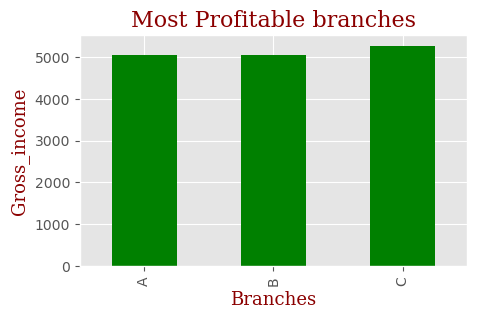

In [480]:
print(data.groupby('Branch')['gross income'].sum())
plt.figure(figsize=(5,3))
data.groupby('Branch')['gross income'].sum().plot(kind='bar',color='green')
plt.title("Most Profitable branches",fontdict=font1)
plt.xlabel("Branches",fontdict=font2)
plt.ylabel("Gross_income",fontdict=font2)
plt.show()

- Branch C is the most profitable branch, with a total gross income of 5,265.18.
- Branch A (5,057.16) and Branch B (5,057.03) generate almost identical profits, indicating very similar cost and pricing structures.
- The profit difference between Branch A and Branch B is negligible, while Branch C shows a clear but moderate lead.

### Is There Any Relationship Between Gender And Gross Income? 

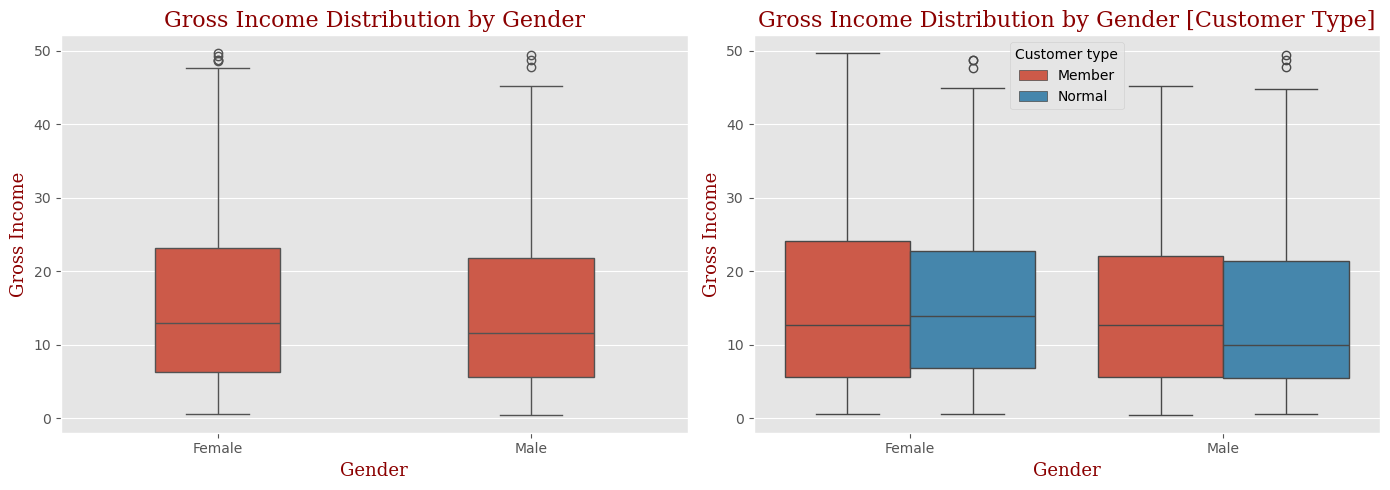

In [483]:
plt.figure(figsize=(14,5))
plt.subplot(121)
sns.boxplot(x = data['Gender'], y = data['gross income'],width=0.4)
plt.title('Gross Income Distribution by Gender',fontdict=font1)
plt.xlabel('Gender' ,fontdict = font2)
plt.ylabel('Gross Income',fontdict=font2)

plt.subplot(122)
sns.boxplot(x = data['Gender'],y = data['gross income'],hue=data['Customer type'])
plt.title('Gross Income Distribution by Gender [Customer Type]',fontdict=font1)
plt.xlabel('Gender' ,fontdict = font2)
plt.ylabel('Gross Income',fontdict=font2)
plt.tight_layout()
plt.show()

- Male and Female customers generate almost the same gross income.
- There is no major difference in profit based on gender.
- Members earn slightly more profit than Normal customers for both genders.
- Overall, gender does not affect gross income.

### Find the product line that generates the most income.

Product line
Food and beverages        2673.5640
Sports and travel         2624.8965
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Home and lifestyle        2564.8530
Health and beauty         2342.5590
Name: gross income, dtype: float64


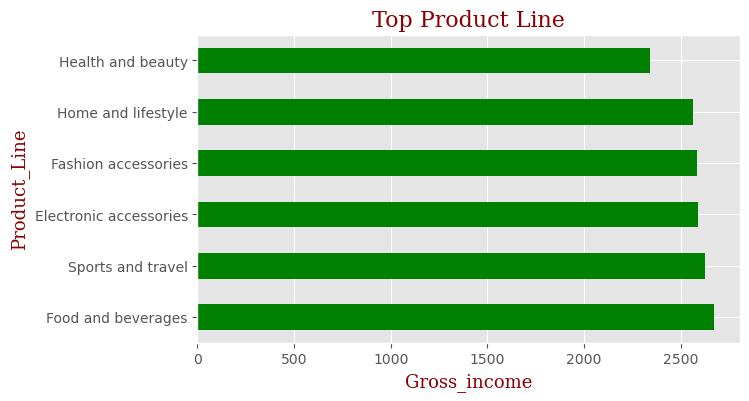

In [486]:
product_income = data.groupby('Product line')['gross income'].sum().sort_values(ascending=False)
print(product_income)
plt.figure(figsize=(7,4))
product_income.plot(kind='barh', color='green')
plt.title('Top Product Line',fontdict=font1)
plt.ylabel('Product_Line',fontdict=font2)
plt.xlabel('Gross_income',fontdict=font2)
plt.show()

- Food and beverages is the most profitable product line, generating a total gross income of 2673.56.
- Sports and travel (2624.90) and Electronic accessories (2587.50) follow closely, showing strong profitability.
- Fashion accessories and Home and lifestyle contribute almost equally to gross income.
- Health and beauty generates the lowest gross income among all product lines.

### Find The Highest Unit Price In The Product Line. 

            Product line  Unit price
983    Health and beauty       99.96
122    Sports and travel       99.96
930   Home and lifestyle       99.92
494  Fashion accessories       99.89
283    Health and beauty       99.83


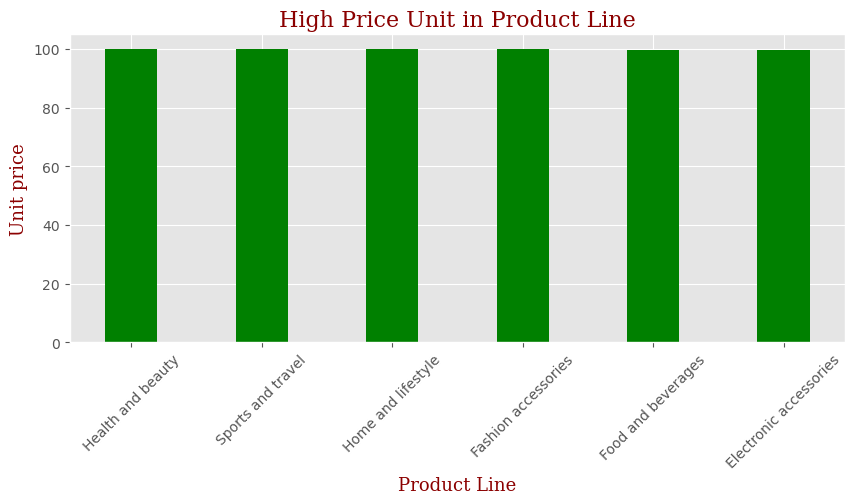

In [489]:
top_unit = data[['Product line','Unit price']].sort_values(by='Unit price', ascending=False)
print(top_unit.head(5))
plt.figure(figsize=(10,4))
plt.bar(top_unit['Product line'],top_unit['Unit price'],color='green',width=0.4)
plt.title('High Price Unit in Product Line',fontdict=font1)
plt.ylabel('Unit price',fontdict=font2)
plt.xlabel('Product Line',fontdict=font2)
plt.xticks(rotation=45)
plt.show()

- The highest unit price (99.96) appears in Health and Beauty and Sports and Travel, indicating the presence of premium-priced products in these categories.
- Home and Lifestyle (99.92) and Fashion Accessories (99.89) also include high-value items, showing that expensive products are spread across multiple product lines.
- Premium-priced products exist across several product lines, with Health and Beauty and Sports and Travel having the highest individual unit prices.

### Find Different Payment Methods Used By Customers Citywise.

Payment    Cash  Credit card  Ewallet
City                                 
Mandalay    110          109      113
Naypyitaw   124           98      106
Yangon      110          104      126


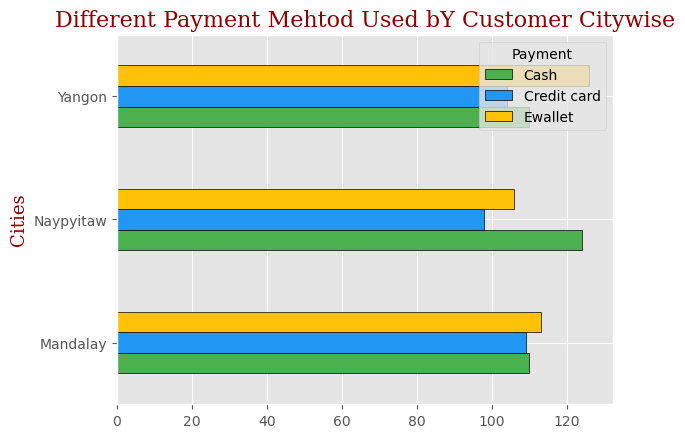

In [492]:
payment_method = data.groupby(['City', 'Payment']).size().unstack()
print(payment_method)
payment_method.plot(kind='barh',color=['#4CAF50', '#2196F3', '#FFC107'],edgecolor='black')
plt.title('Different Payment Mehtod Used bY Customer Citywise',fontdict=font1)
plt.ylabel('Cities',fontdict=font2)
plt.show()

- Yangon shows the highest use of E-wallets (126), indicating stronger adoption of digital payments.
- Naypyitaw has the highest cash usage (124), suggesting a greater reliance on traditional payment methods.
- Credit card usage is lowest in Naypyitaw (98) compared to other cities.
- Mandalay shows a balanced distribution across all three payment methods.
- Overall, while payment preferences vary slightly by city, cash and e-wallets dominate, with credit cards being used less frequently.

### Which Product Line Is Purchased In The Highest Quantity ?

Product line
Electronic accessories    971
Food and beverages        952
Sports and travel         920
Home and lifestyle        911
Fashion accessories       902
Health and beauty         854
Name: Quantity, dtype: int64


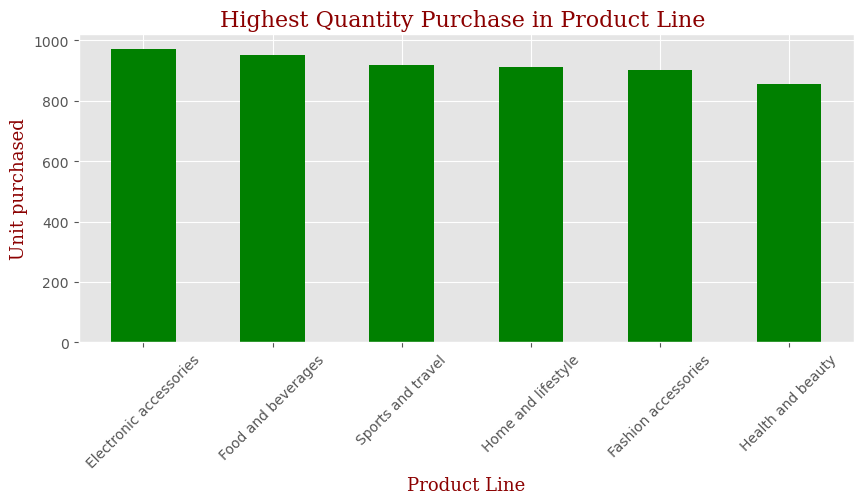

In [495]:
product_quantity = data.groupby('Product line')['Quantity'].sum().sort_values(ascending=False)
print(product_quantity)
plt.figure(figsize=(10,4))
product_quantity.plot(kind='bar',color='green')
plt.title('Highest Quantity Purchase in Product Line ',fontdict=font1)
plt.ylabel('Unit purchased',fontdict=font2)
plt.xlabel('Product Line',fontdict=font2)
plt.xticks(rotation=45)
plt.show()

- Electronic accessories is the most purchased product line, with a total quantity of 971 units, indicating the highest demand among customers.
- Food and beverages (952 units) closely follows, showing strong and consistent consumer demand.
- Sports and travel and Home and lifestyle have moderate purchase volumes, reflecting steady but comparatively lower demand.
- Health and beauty records the lowest total quantity purchased, suggesting relatively lower sales volume compared to other product lines.

### Display Daily Sales by Day of the Week

Day
Friday       43926.3405
Monday       37899.0780
Saturday     56120.8095
Sunday       44457.8925
Thursday     45349.2480
Tuesday      51482.2455
Wednesday    43731.1350
Name: Total, dtype: float64


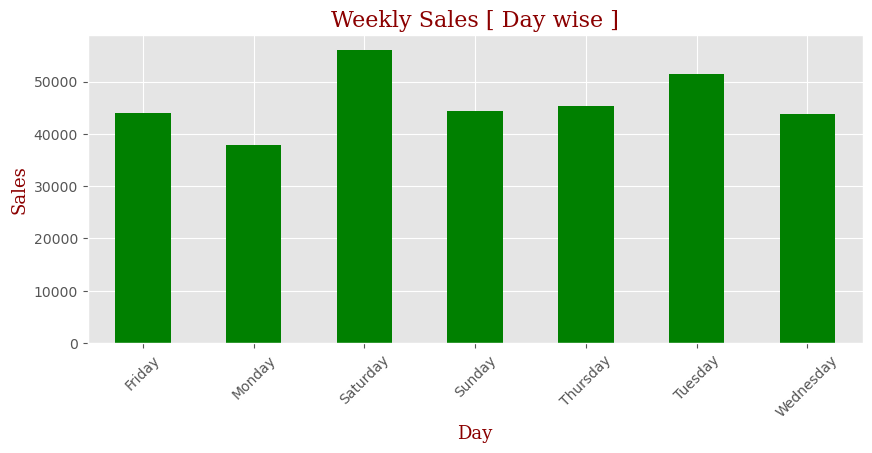

In [498]:
data['Day'] = data['Date'].dt.day_name()
daily_sales = data.groupby('Day')['Total'].sum()
print(daily_sales)
plt.figure(figsize=(10,4))
daily_sales.plot(kind = 'bar',color='green')
plt.title('Weekly Sales [ Day wise ]',fontdict=font1)
plt.ylabel('Sales',fontdict=font2)
plt.xlabel('Day',fontdict=font2)
plt.xticks(rotation=45)
plt.show()

- Saturday records the highest total sales (56,120.81), indicating peak customer activity during weekends.
- Tuesday (51,482.25) shows the second-highest sales, suggesting strong mid-week shopping.
- Monday (37,899.08) has the lowest sales, indicating reduced customer activity at the start of the week.
- Sales on Friday, Sunday, Wednesday, and Thursday remain relatively consistent, showing stable weekday performance.

### What Will Be the Highest Months for Sales

Month
February     97219.374
January     116291.868
March       109455.507
Name: Total, dtype: float64


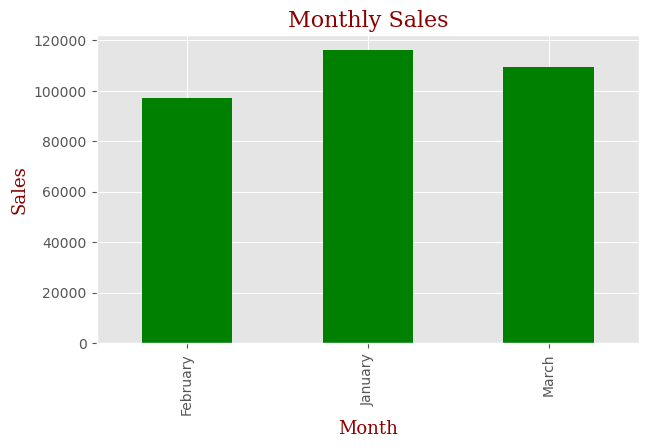

In [501]:
data['Month'] = data['Date'].dt.month_name()
monthly_sales = data.groupby('Month')['Total'].sum()
print(monthly_sales)
plt.figure(figsize=(7,4))
monthly_sales.plot(kind = 'bar',color='green')
plt.title('Monthly Sales',fontdict=font1)
plt.ylabel('Sales',fontdict=font2)
plt.xlabel('Month',fontdict=font2)
plt.show()

- January records the highest total sales (116,291.87), indicating a strong start to the year.
- March (109,455.51) follows closely, showing continued high sales performance.
- February has the lowest sales (97,219.37) among the three months.
- Sales peak in January, dip in February, and recover in March, suggesting a short-term seasonal variation rather than a continuous decline.